Name : Philippe Kabenla

Course: CYB 674

#                                     Analytical Project Assignment
##                                              Detecting network intrusions

### Data description

XYZ Bank is a large and profitable bank in Saint Louis, Missouri. Like any large corporation, XYZ Bank has a very large

and intricate infrastructure that supports its networking system. A Network Analyst recently discovered unusual network

activity. Then, pouring over year’s worth of logs, their team of analysts discovered many instances of anomalous

network activity that resulted in significant sums of money being siphoned from bank accounts.  The Chief Networking 

Officer has come to your group for help in developing a system that can automatically detect and warn of such known, as 

well as other unknown, anomalous network activities.


The network_traffic.csv file is a synopsis of logged network activity. It contains labeled examples of benign network 

sessions as well as examples of sessions involving intrusions.  It is important to note that it is likely that there 

exist many different intrusion types in the data, but we will treat all intrusions as the same.  The 

data_description.txt file provides explanations of each of the attributes found in the network_traffic dataset.


# 1. Data exploration

In [1]:
import pandas as pd
import numpy as np

Let's import the data and see the number of rows and columns.

In [2]:
net_df = pd.read_csv("network_data_CYB_674.csv", sep = ",")
net_df = pd.DataFrame(net_df)
net_df.head()


,Unnamed: 0,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,...,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,is_intrusion
0,0,190.048316,udp,private,SF,105,146,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0.000000,udp,private,SF,105,105,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2,0.000000,udp,private,unknown,105,146,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,3,0.000000,udp,private,SF,105,146,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,4,0.000000,udp,private,SF,105,147,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [3]:
nRow = net_df.shape[0]
nCol = net_df.shape[1]

In [4]:
print(f" the dataset has initially {nRow} rows and {nCol} columns.")

 the dataset has initially 699 rows and 24 columns.


The table above can't fit all the columns. However, le's look at all the possible columns names included in the 

dataset and then compute a statistical summary.

In [5]:
net_df.columns

Index(['Unnamed: 0', 'duration', 'protocol_type', 'service', 'flag',
       'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'is_intrusion'],
      dtype='object')

In [6]:
#let's get some information about the data
net_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          699 non-null    int64  
 1   duration            699 non-null    float64
 2   protocol_type       699 non-null    object 
 3   service             699 non-null    object 
 4   flag                699 non-null    object 
 5   src_bytes           699 non-null    int64  
 6   dst_bytes           699 non-null    int64  
 7   land                699 non-null    int64  
 8   wrong_fragment      699 non-null    int64  
 9   urgent              699 non-null    int64  
 10  hot                 699 non-null    int64  
 11  num_failed_logins   699 non-null    int64  
 12  logged_in           699 non-null    int64  
 13  num_compromised     699 non-null    int64  
 14  root_shell          699 non-null    int64  
 15  su_attempted        699 non-null    int64  
 16  num_root

In [7]:
net_df.describe()

,Unnamed: 0,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,...,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,is_intrusion
count,699.000000,699.000000,699.000000,699.000000,699.0,699.0,699.0,699.000000,699.0,699.000000,...,699.000000,699.000000,699.000000,699.0,699.0,699.000000,699.0,699.0,699.000000,699.000000
mean,349.000000,190.048316,18032.052933,1806.351931,0.0,0.0,0.0,0.151645,0.0,0.590844,...,0.001431,0.002861,1.429185,0.0,0.0,0.007153,0.0,0.0,0.051502,0.429185
std,201.928205,814.873870,59040.018323,8271.114218,0.0,0.0,0.0,1.071863,0.0,0.492030,...,0.037823,0.075647,36.879601,0.0,0.0,0.189117,0.0,0.0,0.221178,0.495314
min,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
25%,174.500000,0.000000,105.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
50%,349.000000,0.000000,217.000000,147.000000,0.0,0.0,0.0,0.000000,0.0,1.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
75%,523.500000,1.000000,330.500000,760.500000,0.0,0.0,0.0,0.000000,0.0,1.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,1.000000
max,698.000000,15122.000000,283618.000000,176690.000000,0.0,0.0,0.0,25.000000,0.0,1.000000,...,1.000000,2.000000,975.000000,0.0,0.0,5.000000,0.0,0.0,1.000000,1.000000


The statical summary of the data displays the count of rows, mean, standard deviation, minimum, and maximum for columns 

that have numerical values. The count for all  the listed columns is the same. However, colums (land, wrong_fragment, 

urgent, num_failed_logins, num_file_creations, num_shells, num_outbound_cmds, is_host_login) have "0" values and 

therefore, unnecessary for this study.

# 2. Data preparation

let's identify data elements that are incorrect and decide how to replace them. The process includes identifying all 

possible null values and then clean the data accordingly.

### A. Identify null values in the data

In [8]:
#Checking for missing values in the dataset
net_df.isnull().sum()

Unnamed: 0            0
duration              0
protocol_type         0
service               0
flag                  0
src_bytes             0
dst_bytes             0
land                  0
wrong_fragment        0
urgent                0
hot                   0
num_failed_logins     0
logged_in             0
num_compromised       0
root_shell            0
su_attempted          0
num_root              0
num_file_creations    0
num_shells            0
num_access_files      0
num_outbound_cmds     0
is_host_login         0
is_guest_login        0
is_intrusion          0
dtype: int64

The data has 20 null values in total and only colums "duration" and "flag" are affected.

### B. Replace null values of "duration" by its mean and "flag" by "unknown"

In [9]:
data_df= net_df

In [10]:
data_df['duration'].fillna(data_df['duration'].mean(), inplace = True)
data_df.head()

,Unnamed: 0,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,...,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,is_intrusion
0,0,190.048316,udp,private,SF,105,146,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0.000000,udp,private,SF,105,105,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2,0.000000,udp,private,unknown,105,146,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,3,0.000000,udp,private,SF,105,146,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,4,0.000000,udp,private,SF,105,147,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [11]:
#Let's replace null values in "flag" columns by 0

In [12]:
data_df['flag']= data_df['flag'].fillna("unknown")
data_df.head()

,Unnamed: 0,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,...,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,is_intrusion
0,0,190.048316,udp,private,SF,105,146,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0.000000,udp,private,SF,105,105,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2,0.000000,udp,private,unknown,105,146,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,3,0.000000,udp,private,SF,105,146,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,4,0.000000,udp,private,SF,105,147,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Let's see if there is any cull values in the new save dataset.

In [13]:
data_df.isnull().sum().sum()

0

Now, the dataset has 0 null values.

### C. creation of a new dataset with useful columns for this study

The new dataset is named "data_df2" which contains the the columns below.

In [14]:
data_df2 = data_df
data_df2 = data_df2[['protocol_type', 'service', 'flag','duration','src_bytes', 'dst_bytes',
                     'num_compromised', 'num_access_files', 'is_guest_login', 'is_intrusion']]
data_df2.head()

,protocol_type,service,flag,duration,src_bytes,dst_bytes,num_compromised,num_access_files,is_guest_login,is_intrusion
0,udp,private,SF,190.048316,105,146,0,0,0,1
1,udp,private,SF,0.000000,105,105,0,0,0,1
2,udp,private,unknown,0.000000,105,146,0,0,0,1
3,udp,private,SF,0.000000,105,146,0,0,0,1
4,udp,private,SF,0.000000,105,147,0,0,0,1


#### Now, let's create a new column within the new dataset that returns True if there is intrusion and a False if there is not.

Let's name the column "intrusion".

In [15]:
intrusion = data_df2['is_intrusion']== 1
intrusion

0       True
1       True
2       True
3       True
4       True
       ...  
694    False
695    False
696    False
697    False
698    False
Name: is_intrusion, Length: 699, dtype: bool

#### Let's include the new column "intrusion" in the dataset data_df2.

In [16]:
data_df2.insert(10, 'intrusion', intrusion)

In [17]:
data_df2.head()

,protocol_type,service,flag,duration,src_bytes,dst_bytes,num_compromised,num_access_files,is_guest_login,is_intrusion,intrusion
0,udp,private,SF,190.048316,105,146,0,0,0,1,True
1,udp,private,SF,0.000000,105,105,0,0,0,1,True
2,udp,private,unknown,0.000000,105,146,0,0,0,1,True
3,udp,private,SF,0.000000,105,146,0,0,0,1,True
4,udp,private,SF,0.000000,105,147,0,0,0,1,True


## Benign intrusion detection

Let's create a new function that returnns all the value of benign intrusion supported by a "for" function.

In [18]:
def benign_intrusion_data(intrusion):
    for i in range(len(data_df2)):
        if intrusion[i] == False:
            print("Protocol type: {protocol_type:<5s} Service: {service:<10s} has a benign intrusion mainly from destination to source (# data bytes): {dst_bytes}".format(protocol_type = data_df2.iloc[i,0],
            service = data_df2.iloc[i,1], dst_bytes = data_df2.iloc[i,5])) 

In [19]:
benign_intrusion_data(intrusion)

Protocol type: tcp   Service: http       has a benign intrusion mainly from destination to source (# data bytes): 896
Protocol type: tcp   Service: http       has a benign intrusion mainly from destination to source (# data bytes): 1588
Protocol type: tcp   Service: http       has a benign intrusion mainly from destination to source (# data bytes): 7334
Protocol type: tcp   Service: http       has a benign intrusion mainly from destination to source (# data bytes): 8679
Protocol type: tcp   Service: http       has a benign intrusion mainly from destination to source (# data bytes): 1658
Protocol type: tcp   Service: http       has a benign intrusion mainly from destination to source (# data bytes): 505
Protocol type: tcp   Service: http       has a benign intrusion mainly from destination to source (# data bytes): 445
Protocol type: tcp   Service: http       has a benign intrusion mainly from destination to source (# data bytes): 2431
Protocol type: tcp   Service: http       has a beni

## Malicious intrusion detection

Let's create a new function that returnns all the value of malicious intrusion supported by a "for" function

In [20]:
def malicious_intrusion_data(intrusion):
    for i in range(len(data_df2)):
        if intrusion[i] == True:
            print("Protocol type: {protocol_type:<5s} Service: {service:<7s} has a malicious intrusion mainly from source to destination (# data bytes): {src_bytes}".format(protocol_type = data_df2.iloc[i,0],
            service = data_df2.iloc[i,1], src_bytes = data_df2.iloc[i,4])) 

In [21]:
malicious_intrusion_data(intrusion)

Protocol type: udp   Service: private has a malicious intrusion mainly from source to destination (# data bytes): 105
Protocol type: udp   Service: private has a malicious intrusion mainly from source to destination (# data bytes): 105
Protocol type: udp   Service: private has a malicious intrusion mainly from source to destination (# data bytes): 105
Protocol type: udp   Service: private has a malicious intrusion mainly from source to destination (# data bytes): 105
Protocol type: udp   Service: private has a malicious intrusion mainly from source to destination (# data bytes): 105
Protocol type: udp   Service: private has a malicious intrusion mainly from source to destination (# data bytes): 105
Protocol type: udp   Service: private has a malicious intrusion mainly from source to destination (# data bytes): 105
Protocol type: udp   Service: private has a malicious intrusion mainly from source to destination (# data bytes): 105
Protocol type: udp   Service: private has a malicious in

# D. Data visualization

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

#### Let's get a summary of the new dataset called data_df2.

In [23]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
data_df2.describe()

,duration,src_bytes,dst_bytes,num_compromised,num_access_files,is_guest_login,is_intrusion
count,699.00,699.00,699.00,699.00,699.00,699.00,699.00
mean,190.05,18032.05,1806.35,1.26,0.01,0.05,0.43
std,814.87,59040.02,8271.11,33.44,0.19,0.22,0.50
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,105.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,217.00,147.00,0.00,0.00,0.00,0.00
75%,1.00,330.50,760.50,0.00,0.00,0.00,1.00
max,15122.00,283618.00,176690.00,884.00,5.00,1.00,1.00


### D.1. Protocol type 

In [24]:
#let's get the count values of protocol type
protocol_type_count = data_df2['protocol_type'].value_counts()
protocol_type_count

tcp     532
udp     162
icmp      5
Name: protocol_type, dtype: int64

In [25]:
#create some percent values of each protocol type
protocol_type_percent = protocol_type_count/len(data_df2['protocol_type'])
protocol_type_percent

tcp    0.76
udp    0.23
icmp   0.01
Name: protocol_type, dtype: float64

In [26]:
#create index of protocol type
protocol_type_index = protocol_type_percent.value_counts().index
protocol_type_index

Float64Index([0.7610872675250357, 0.2317596566523605, 0.00715307582260372], dtype='float64')

In [27]:
protocol_type_index_new = data_df2['protocol_type'].value_counts().index
protocol_type_index_new

Index(['tcp', 'udp', 'icmp'], dtype='object')

###   D.1.2. Now, let's plot the bar graph

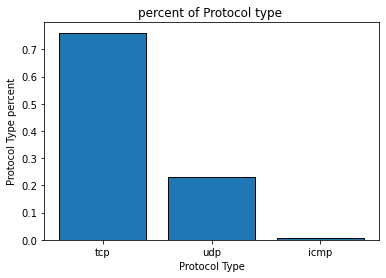

In [28]:
plt.bar( protocol_type_index_new, protocol_type_percent , edgecolor ='black')
plt.xlabel('Protocol Type')
plt.ylabel('Protocol Type percent')
plt.title('percent of Protocol type ')
plt.show()

### both UDP and TCP have the most network intrusions based of the chart above

The dataset contains a list of three protocol types such as: TCP, ICMP, and UDP.

During the analysis, both UDP and TCP protocols come out to be the only pathways of intrusion.

This data appears to represent the protocol types used in this study. TCP represents 76% of benign and malicious 

intrusion, while UDP and ICMP represent 23%, 1% respectively.

### D.2. Service

In [29]:
#let's get the network service counts
service_count = data_df2['service'].value_counts()
service_count

http        365
private     120
ftp_data     88
smtp         41
ftp          36
domain_u     27
other         9
ntp_u         6
eco_i         4
urp_i         1
telnet        1
finger        1
Name: service, dtype: int64

In [30]:
#get the count value for each type of service
service_percent = service_count/len(data_df2['service'])
service_percent

http       0.52
private    0.17
ftp_data   0.13
smtp       0.06
ftp        0.05
domain_u   0.04
other      0.01
ntp_u      0.01
eco_i      0.01
urp_i      0.00
telnet     0.00
finger     0.00
Name: service, dtype: float64

In [31]:
#get the indices
service_index = data_df2['service'].value_counts().index
service_index

Index(['http', 'private', 'ftp_data', 'smtp', 'ftp', 'domain_u', 'other',
       'ntp_u', 'eco_i', 'urp_i', 'telnet', 'finger'],
      dtype='object')

### D.2.1. service's visualization

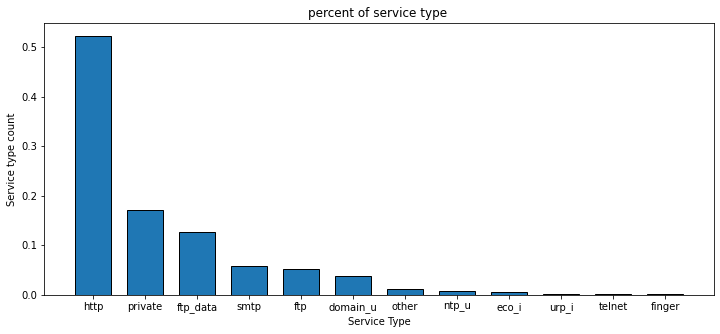

In [32]:
plt.figure(figsize=(12,5))
plt.bar(service_index, service_percent , edgecolor ='black', width =.7)
plt.xlabel('Service Type')
plt.ylabel('Service type count')
plt.title('percent of service type ')
plt.show()


This data appears to represent the service used in this stusy. HTTP is the most used service with a percent of 0.52, followed 

by private and ftp_data with some percent of 0.17 and 0.13 respectively on a scale of 0 to 1.

### D.3. identify differences between benign and malicious intrusion data

<AxesSubplot:xlabel='intrusion'>

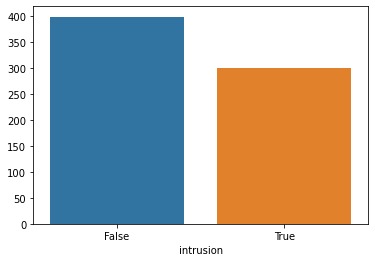

In [33]:
# le's plot the benign and malicious intrusion data.
# size() is equivalent to counting the distinct rows
result = data_df2.groupby(['intrusion']).size()
 
# plot the result
sns.barplot(x = result.index, y = result.values)

In [34]:
#let's get the value counts and percent of "intrusion" variable.
intrusion_count = data_df2['intrusion'].value_counts()
intrusion_count

False    399
True     300
Name: intrusion, dtype: int64

In [35]:
intrusion_percent = intrusion_count/len(data_df2['intrusion'])
intrusion_percent

False   0.57
True    0.43
Name: intrusion, dtype: float64

For this study, "False" represents benign intrusion and "True", malicious intrusion. the graph displayed above shows the 

diffefence between benign and malicious intrusion. As you can see, there are 57% benign and 43% malicious intrusions. However, 

let's see the factors that contributed to these results and which areas were affected the most.


### D.3.1. Intrusion type for each protocol type based on the length of connection (duration)

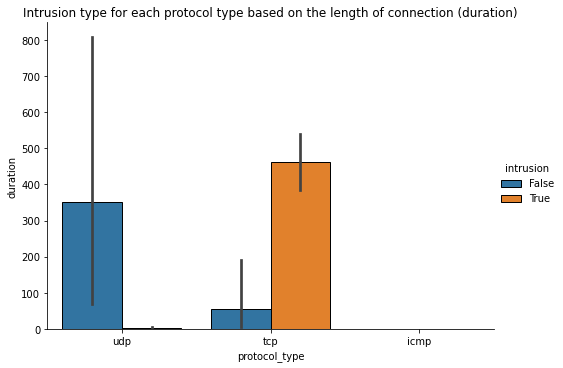

In [36]:
#let's plot the graph
sns.catplot(data = data_df2, kind= "bar", x = 'protocol_type', y= 'duration', 
            hue ='intrusion', edgecolor ='black', aspect=11.7/8.27)
plt.title('Intrusion type for each protocol type based on the length of connection (duration)')
plt.show()

In [37]:
#let's get some information about the graph
pro_dur_int_count = data_df2.groupby(['protocol_type','intrusion' ]).mean()['duration']
pro_dur_int_count

protocol_type  intrusion
icmp           False         0.00
tcp            False        55.08
               True        463.21
udp            False       350.37
               True          1.92
Name: duration, dtype: float64

In [38]:
percent = pro_dur_int_count / len(data_df2['protocol_type'])
percent

protocol_type  intrusion
icmp           False       0.00
tcp            False       0.08
               True        0.66
udp            False       0.50
               True        0.00
Name: duration, dtype: float64

the visualization above displays the intrusion type for each protocol type based on the length of connection (duration).

As you can see, ICMP accounts for 0% of both benign and malicious intrusion. TCP and UDP are the protocol types the most used 

according to the study. TCP accounts for 8% benign and 66% malicious, while UDP accounts for 50% benign and 0% malicious 

intrusion. However, malicious intrusions mostly occur at the protocol "TCP" and benign at the UDP protocol. Next, let's see the 

intrusion type for each protocol type based on number of data bytes from source to destination.

### D.3.2. Intrusion type for each protocol type based on number of data bytes from source to destination.

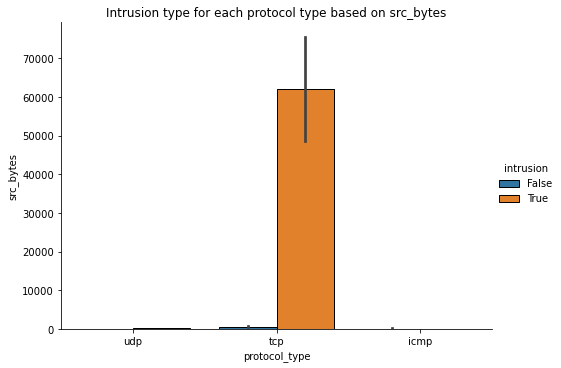

In [39]:
#let's plot the graphof intrusion and protocol based on src_bytes.
sns.catplot(data = data_df2, kind= "bar", x = 'protocol_type', y= 'src_bytes', 
            hue ='intrusion', edgecolor ='black', aspect=11.7/8.27)
plt.title('Intrusion type for each protocol type based on src_bytes')
plt.show()

In [40]:
pro_byt_int = data_df2.groupby(['protocol_type', 'intrusion']).mean()['src_bytes']
pro_byt_int

protocol_type  intrusion
icmp           False          60.20
tcp            False         611.16
               True        61928.89
udp            False          79.35
               True          105.00
Name: src_bytes, dtype: float64

The graph above displays the intrusion type for each protocol type based on number of data bytes from source to destination. As 

you can see, the intrusions are mostly malicious and in provenance of TCP protocol with 98.6%.Therefore, malicious intrusions occurred 

mostly from source to destination  Next, let's see inntrusion type for each protocol type based on number of data bytes from 

destination to source.

### D.3.3. Intrusion type for each protocol type based on number of data bytes from destination to source.

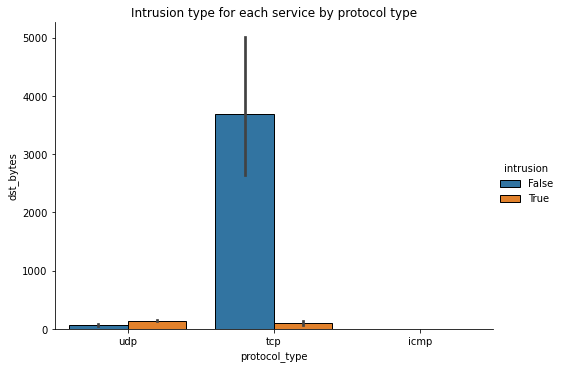

In [41]:
#let's plot the grath with seaborn
sns.catplot(data = data_df2, kind= "bar", x = 'protocol_type', y= 'dst_bytes', 
            hue ='intrusion', edgecolor ='black', aspect=11.7/8.27)
plt.title('Intrusion type for each service by protocol type')
plt.show()

In [42]:
pro_byt_int2 = data_df2.groupby(['protocol_type', 'intrusion']).mean()['dst_bytes']
pro_byt_int2

protocol_type  intrusion
icmp           False          0.00
tcp            False       3687.30
               True          98.58
udp            False         71.47
               True         143.09
Name: dst_bytes, dtype: float64

The graph above represents the intrusion type for each protocol based on the number of data bytes from destination to source. 

the results clearly unfold the dominance of benign intrusion through TCP protocol with 92.2%. Next, let's take a deeper look of 

intrusions through the different types of service such as (private, http, ftp_data, ftp and so on). 

### D.3.4. Intrusion type for each network service based on the number of data bytes from source to destination.

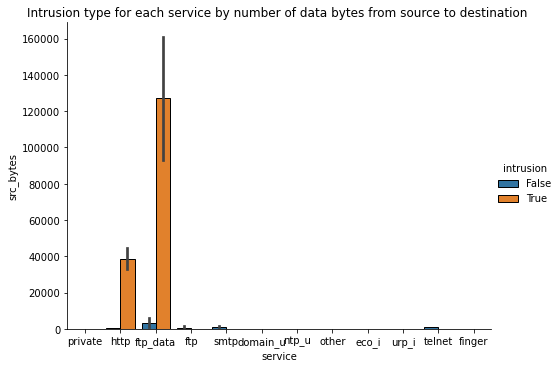

In [43]:
#let's plot the graph
sns.catplot(data = data_df2, kind= "bar", x = 'service', y= 'src_bytes', 
            hue ='intrusion', edgecolor ='black', aspect=11.7/8.27)
plt.title('Intrusion type for each service by number of data bytes from source to destination ')
plt.show()

In [44]:
ser_byt_int = data_df2.groupby(['service', 'intrusion']).mean()['src_bytes']
ser_byt_int

service   intrusion
domain_u  False           45.15
eco_i     False           30.00
finger    False            7.00
ftp       False          693.67
          True           160.21
ftp_data  False         3162.38
          True        126999.76
http      False          300.92
          True         38715.08
ntp_u     False           48.00
other     False          145.89
private   False          105.00
          True           105.00
smtp      False         1305.12
telnet    False         1154.00
urp_i     False          181.00
Name: src_bytes, dtype: float64

As you can see the services such as HTTP and FTP_data display more malicious intrusion than any other services. In addition, 

FTP_data shows the most malicious intrusions ever detected from source to destination only with 73.3% followed by HTTP 

accounting for 22.4%. Next, let's see what association the length of connection has to do with the intrusion through each 

network service.

### D.3.5. Intrusion type for each network service based on the length of the connection.

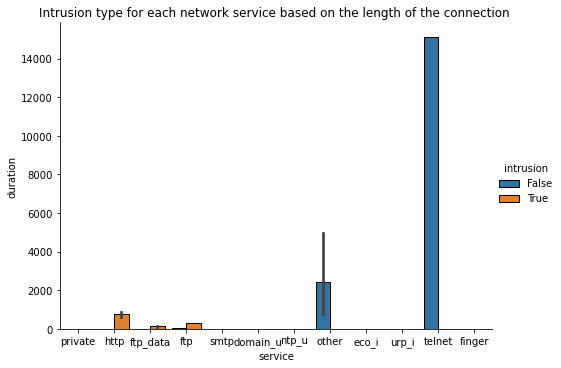

In [45]:
#let's plot the graph
sns.catplot(data = data_df2, kind= "bar", x = 'service', y= 'duration', 
            hue ='intrusion', edgecolor ='black', aspect=11.7/8.27)
plt.title('Intrusion type for each network service based on the length of the connection ')
plt.show()

In [46]:
ser_byt = data_df2.groupby(['service', 'intrusion']).mean()['duration']
ser_byt

service   intrusion
domain_u  False           0.11
eco_i     False           0.00
finger    False           0.00
ftp       False          24.67
          True          282.06
ftp_data  False           0.00
          True          125.37
http      False          11.27
          True          749.35
ntp_u     False           0.00
other     False        2408.78
private   False           2.05
          True            1.92
smtp      False           2.49
telnet    False       15122.00
urp_i     False           0.00
Name: duration, dtype: float64

The graph above displays the intrusion type for each network service based on the length of the connection. However, the network 

services such as: "telnet" and "other" display most of the benign intrusion with a large margin where telnet accounts for 80.7% 

and "other", 12.9%. From the left of the chart, you can see that HTTP , FTP, and FTP_data show some malicious intrusions but 

very minimal compared to volume of benign intrusions. Next, let's see what the number of data bytes from destination to source 

has to do with intrusion through the network services.

### D.3.6. Intrusion type for each network service based on the number of data bytes from destination to source.

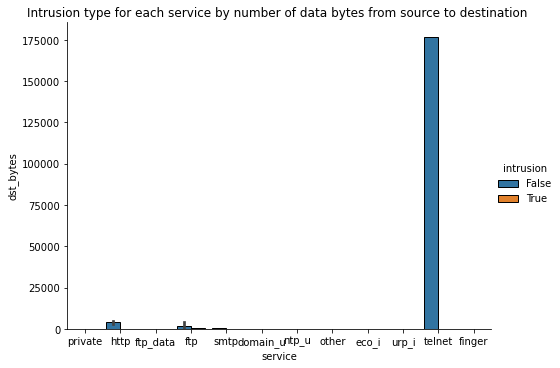

In [47]:
#let's plot the graph
sns.catplot(data = data_df2, kind= "bar", x = 'service', y= 'dst_bytes', 
            hue ='intrusion', edgecolor ='black', aspect=11.7/8.27)
plt.title('Intrusion type for each service by number of data bytes from source to destination ')
plt.show()

In [48]:
ser_bytes = data_df2.groupby(['service', 'intrusion']).mean()['dst_bytes']
ser_bytes

service   intrusion
domain_u  False           54.63
eco_i     False            0.00
finger    False          141.00
ftp       False         1994.33
          True           597.24
ftp_data  False            0.00
          True             0.00
http      False         3878.34
          True             0.07
ntp_u     False           48.00
other     False           70.00
private   False          101.90
          True           143.09
smtp      False          331.98
telnet    False       176690.00
urp_i     False            0.00
Name: dst_bytes, dtype: float64

The graph above shows the intrusion type for each network service based on the number of data bytes from destination to source.

The network service "telnet" displays increbible data of benign intrusions from destination to source with 96% accounted for 

telnet only and 2.1% for HTTP. Therefore, from destination to source, a significance of benign intrusions occur.

### D.3.7 Quick glance at Telnet network service

In [49]:
net_df.groupby('service').mean()

,Unnamed: 0,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,...,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,is_intrusion
service,,,,,,,,,,,,,,,,,,,,,
domain_u,460.67,0.11,45.15,54.63,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
eco_i,530.25,0.00,30.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
finger,690.00,0.00,7.00,141.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ftp,261.19,260.61,204.67,713.67,0.00,0.00,0.00,2.81,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.92
ftp_data,305.17,95.45,97447.66,0.00,0.00,0.00,0.00,0.06,0.00,0.20,...,0.00,0.00,0.27,0.00,0.00,0.00,0.00,0.00,0.00,0.76
http,394.78,213.49,10825.35,2815.80,0.00,0.00,0.00,0.00,0.00,0.87,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.27
ntp_u,531.50,0.00,48.00,48.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
other,430.78,2408.78,145.89,70.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
private,146.79,1.94,105.00,136.22,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.83


## Note

This code below is used to get the the value of "whole" in the "def" function

In [50]:
#for example:
sum(data_df2.groupby(['service', 'intrusion']).mean()['duration'])

18730.072016980474

The code below is used to calculate the percentage in this study

In [51]:
#for example
def percentage(part, whole):
    percentage = 100 * float(part)/float(whole)
    return str(percentage) + "%"
print(percentage(15122, 18730))

80.7367859049653%


# Logistic regression

In [52]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

In [53]:
data_df2.head()
datat = data_df2
datat = datat.drop(['protocol_type','service','flag','intrusion','num_compromised', 'num_access_files' ], axis = 1)
datat.head()

,duration,src_bytes,dst_bytes,is_guest_login,is_intrusion
0,190.05,105,146,0,1
1,0.00,105,105,0,1
2,0.00,105,146,0,1
3,0.00,105,146,0,1
4,0.00,105,147,0,1


In [54]:
#let's define the dependent and independent variables
x = datat.drop(['is_intrusion', 'duration'], axis = 1)
y = datat['is_intrusion']
x.head()


,src_bytes,dst_bytes,is_guest_login
0,105,146,0
1,105,105,0
2,105,146,0
3,105,146,0
4,105,147,0


In [55]:
#run the regression and graph
x1 = sm.add_constant(x)
reg_log = sm.Logit(y,x1)
results_log = reg_log.fit()
# Get the regression summary
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.342870
         Iterations 12


C:\Users\philippe\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\philippe\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           is_intrusion   No. Observations:                  699
Model:                          Logit   Df Residuals:                      695
Method:                           MLE   Df Model:                            3
Date:                Tue, 24 Jan 2023   Pseudo R-squ.:                  0.4981
Time:                        20:40:39   Log-Likelihood:                -239.67
converged:                       True   LL-Null:                       -477.48
Covariance Type:            nonrobust   LLR p-value:                9.165e-103
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.7767      0.156      4.973      0.000       0.471       1.083
src_bytes       5.355e-05   1.63e-05      3.290      0.001    2.17e-05    8.54e-05
dst_bytes         -0.0073      0.001     -8.207      0.000      -0.009      -0.006
is_guest_login     6.7776      0.936      7.239      0.000       4.942       8.613
==================================================================================

Possibly complete quasi-separation: A fraction 0.23 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

# confusion matrix

In [56]:
def confusion_matrix(datat,actual_values,model):
    pred_values = model.predict(datat)
    # Specify the bins 
    bins=np.array([0,0.5,1])
    # Create a histogram, where if values are between 0 and 0.5 tell will be considered 0
    # if they are between 0.5 and 1, they will be considered 1
    cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
    # Calculate the accuracy
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    # Return the confusion matrix and 
    return cm, accuracy
    # Confusion matrix 
        
        # Parameters
        # ----------
        # data: data frame or array
            # data is a data frame formatted in the same way as your input data (without the actual values)
            # e.g. const, var1, var2, etc. Order is very important!
        # actual_values: data frame or array
            # These are the actual values from the test_data
            # In the case of a logistic regression, it should be a single column with 0s and 1s
            
        # model: a LogitResults object
            # this is the variable where you have the fitted model 
            # e.g. results_log in this course
        # ----------    

In [57]:
confusion_matrix(x1, y, results_log)

(array([[312.,  87.],
        [ 92., 208.]]),
 0.7439198855507868)

In [58]:
datat.shape

(699, 5)

# k-nearest neighbor algorithm in Python

In [59]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [60]:
# Create feature and target arrays
x = datat.drop(['is_intrusion', 'duration'], axis = 1)
y = datat['is_intrusion']

In [61]:
# Split into training and test set
x_train, x_test, y_train, y_test = train_test_split(
             x, y, test_size = 0.2, random_state=42)

In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [63]:
knn = KNeighborsClassifier(n_neighbors=4)
 
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [64]:
# Predict on dataset which model has not seen before
print(knn.predict(x_test))
pred = knn.predict(x_test)

[1 0 0 1 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 0 1 1 1 0 0
 0 0 1 1 1 1 0 0 0 0 0 1 1 0 1 0 1 1 0 1 1 1 0 1 0 0 1 0 0 1 1 1 1 0 1 1 1
 0 1 0 0 1 0 1 1 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1
 0 1 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 1 1 0 1 1]


In [65]:
#evaluate algorithm
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[68  4]
 [ 2 66]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.96        72
           1       0.94      0.97      0.96        68

    accuracy                           0.96       140
   macro avg       0.96      0.96      0.96       140
weighted avg       0.96      0.96      0.96       140



In [66]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
pred = knn.predict(x_test)
cm = confusion_matrix(y_test, pred)
cm


array([[68,  4],
       [ 2, 66]], dtype=int64)

In [67]:
# Calculate the accuracy
accuracy = (cm[0,0]+cm[1,1])/cm.sum()
accuracy

0.9571428571428572

In [68]:
#or we can just use the following code to compute the accuracry
ac = accuracy_score(y_test,pred)
ac

0.9571428571428572

In [69]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [70]:
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
     
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(x_train, y_train)
    test_accuracy[i] = knn.score(x_test, y_test)

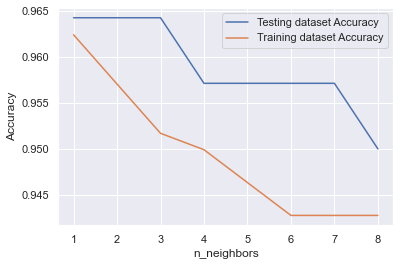

In [71]:
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

## error for k values 

In [72]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 27):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

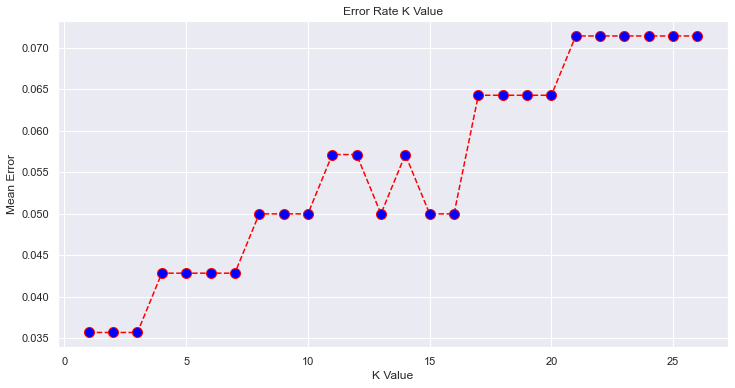

In [73]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 27), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

# Decision Tree

In [74]:
#the process id the same above where we train the data and then scale it.
#let's create a new variable for the model
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion='entropy')
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [75]:
y_prediction = model.predict(x_test)
y_prediction

array([1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1], dtype=int64)

In [76]:
#Find Accuracy of the Model
accuracy=accuracy_score(y_prediction,y_test)*100
print("Accuracy of the model is {:.2f}".format(accuracy))

Accuracy of the model is 95.71


In [77]:
confusion_matrix(y_prediction,y_test)

array([[67,  1],
       [ 5, 67]], dtype=int64)

In [78]:
#lets plot

In [79]:
from sklearn import tree

[Text(0.6129032258064516, 0.95, 'X[1] <= -0.198\nentropy = 0.979\nsamples = 559\nvalue = [327, 232]'),
 Text(0.4838709677419355, 0.85, 'X[0] <= 0.233\nentropy = 0.886\nsamples = 293\nvalue = [89, 204]'),
 Text(0.41935483870967744, 0.75, 'X[1] <= -0.2\nentropy = 0.97\nsamples = 223\nvalue = [89, 134]'),
 Text(0.25806451612903225, 0.65, 'X[0] <= -0.299\nentropy = 0.994\nsamples = 148\nvalue = [81, 67]'),
 Text(0.12903225806451613, 0.55, 'X[0] <= -0.3\nentropy = 0.684\nsamples = 66\nvalue = [12, 54]'),
 Text(0.06451612903225806, 0.45, 'entropy = 0.918\nsamples = 36\nvalue = [12, 24]'),
 Text(0.1935483870967742, 0.45, 'entropy = 0.0\nsamples = 30\nvalue = [0, 30]'),
 Text(0.3870967741935484, 0.55, 'X[0] <= -0.298\nentropy = 0.631\nsamples = 82\nvalue = [69, 13]'),
 Text(0.3225806451612903, 0.45, 'entropy = 0.0\nsamples = 33\nvalue = [33, 0]'),
 Text(0.45161290322580644, 0.45, 'X[0] <= -0.284\nentropy = 0.835\nsamples = 49\nvalue = [36, 13]'),
 Text(0.22580645161290322, 0.35, 'X[0] <= -0.29

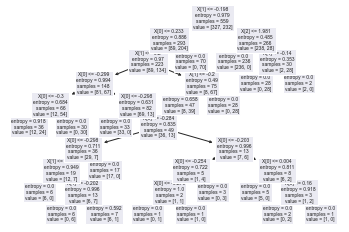

In [80]:
tree.plot_tree(model)

# K-means

In [81]:
from sklearn.cluster import KMeans

In [82]:
x = datat.drop(['is_intrusion', 'duration'], axis = 1)
y = datat['is_intrusion']

In [83]:
#feature scaling
cols = x.columns
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

x = ms.fit_transform(x)

In [84]:
import pandas as pd
x = pd.DataFrame(x, columns=[cols])

### elbow method to find optimal number of clusters

C:\Users\philippe\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\philippe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\philippe\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\philippe\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  w

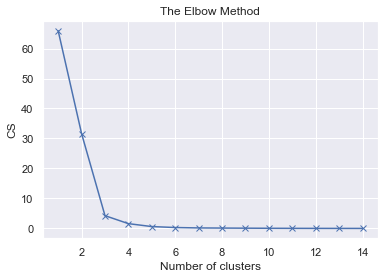

In [85]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 15), cs, marker = 'x')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [86]:
#lets compute the K-means now
kmeans = KMeans(n_clusters=2, random_state=0)

kmeans.fit(x)

C:\Users\philippe\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


KMeans(n_clusters=2, random_state=0)

In [87]:
kmeans.cluster_centers_

array([[ 6.69917135e-02,  1.05590767e-02, -1.24900090e-16],
       [ 7.21627917e-04,  4.03908918e-03,  1.00000000e+00]])

In [88]:
# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 429 out of 699 samples were correctly labeled.
Accuracy score: 0.61


## C. Conclusion

    This study helped uncover a lot of information about the network intrusions from XWZ bank.

According to the analysis, 57% of network intrusions are benign and 43%, malicious. Many factors contributed to

these intrusions. The number of data bytes from both “source to destination“ and “destination to source”, the length 

of the connection, the protocol used, and the network service are some of the key factors that help identify the differences

between benign and malicious intrusions. Nevertheless, the protocol and service types are proven to be important factors 

in this study as they display the routes and traces of all intrusions. TCP and UDP protocols were mostly used during the network 

intrusion which accounts for 76% and 23% respectively. From source to destination, the TCP protocol records 98.6% of malicious 

intrusion in which network services such as FTP_data and HTTP are the main source.  FTP_data accounts for 73.3% and HTTP, 22.4%.  
From destination to source, 92.2 % of benign intrusion comes from TCP protocol where Telnet and HTTP network services are the 

main source with a percentage of 96% for Telnet and 2.1% for HTTP. Lastly, the length of connection is one of the factors that 

differentiate benign and malicious intrusion. According to the analysis, TCP accounts for 8% benign and 66% malicious, while UDP 

accounts for 50% benign and 0% malicious intrusion. Furthermore, FTP, FTP_data, and HTTP network services are mostly used during 

the malicious intrusion.

 
   The limitation of this study falls around the outliers. The outliers were not removed which limited the outcome of the study 
    
by giving false alerts. Most importantly, the Telnet network service accounted for 1 observation which has more data bytes “from 

source to destination” and from “destination to source”, leaving only one with conditions compromised and number of files 

accessed and lots of seconds in length of connection.However, Telnet only accounts for one benign intrusion according to the 

data. Future research should remove all outliers before drawing conlusion from it.
